### Rainfall data 
First part is repretition of the drought analysis but will be shown for completeness

In [1]:
%matplotlib inline 
import glob
import numpy as np 
import matplotlib 
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import image as mpimg
from matplotlib.pyplot import figure
from datetime import timedelta
import scipy.stats as stats
import os

# plotting
from shapely.geometry import Polygon
import geopandas as gpd
from geospatial_functions import get_background_map
import rasterio
from rasterio.plot import show as rioshow
import folium


path = os.getcwd()
home_path = os.path.dirname(os.path.dirname(path))
gis_folder = f'{home_path}\\QGIS project'

easily read all text data files  with:

In [2]:
rainfall = pd.DataFrame()
# Black_volta = -2.75E_9.50N
# Lake_Volta 0.0E_6.5N
# Mouhoun -4.00E_12.00N
# Nakambe -2.0E_13.5N
# Oti = 0.0E_8.5N
# Penjari = 1.0E_11.0N
# Ougadougou = -1.5E_12.4N

In [2]:
glob.glob(f'{home_path}\\data\\Volta_precip_latest\*csv')

['C:\\Users\\david\\Documents\\@@ Python\\Jaar 5\\Q3\\ENVM1400 Information and advice\\Volta project\\Volta-burkina-faso\\data\\Volta_precip_latest\\Black Volta_-2.75_9.55.csv',
 'C:\\Users\\david\\Documents\\@@ Python\\Jaar 5\\Q3\\ENVM1400 Information and advice\\Volta project\\Volta-burkina-faso\\data\\Volta_precip_latest\\Lake Volta_0.05_6.45.csv',
 'C:\\Users\\david\\Documents\\@@ Python\\Jaar 5\\Q3\\ENVM1400 Information and advice\\Volta project\\Volta-burkina-faso\\data\\Volta_precip_latest\\Mouhoun_-3.95_12.05.csv',
 'C:\\Users\\david\\Documents\\@@ Python\\Jaar 5\\Q3\\ENVM1400 Information and advice\\Volta project\\Volta-burkina-faso\\data\\Volta_precip_latest\\Nakambe_-2.15_13.55.csv',
 'C:\\Users\\david\\Documents\\@@ Python\\Jaar 5\\Q3\\ENVM1400 Information and advice\\Volta project\\Volta-burkina-faso\\data\\Volta_precip_latest\\Oti_0.15_8.45.csv',
 'C:\\Users\\david\\Documents\\@@ Python\\Jaar 5\\Q3\\ENVM1400 Information and advice\\Volta project\\Volta-burkina-faso\\data\

In [9]:
lst_dfs = []
for path in glob.glob(f'{home_path}\\data\\Volta_precip_latest\*csv'):
    df_input = pd.read_csv(path, parse_dates = [0], delimiter = ',', index_col=[0],skiprows=1,
                  skipinitialspace = True, header = None, usecols=[0,1], names = ['Date','precipitation'])
    
    lst_dfs.append(df_input)

In [10]:
names_col = ['Black_Volta', 'Lake_Volta','Mouhoun','Nakambe', 'Oti', 'Penjari'] 
Rainfall_data = pd.concat(lst_dfs, axis = 1,  keys = names_col,ignore_index=False)
Rainfall_data.columns = Rainfall_data.columns.droplevel(level=1)

<AxesSubplot: xlabel='Date'>

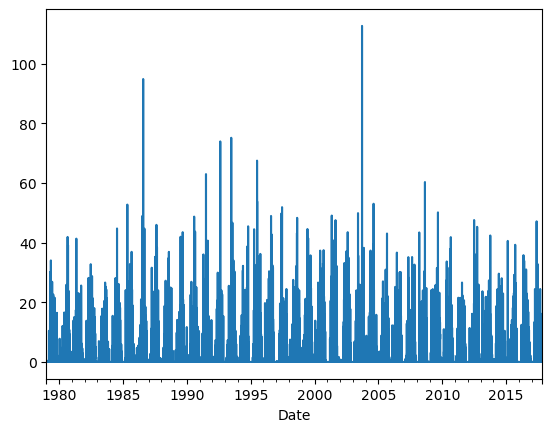

In [13]:
Rainfall_data['Black_Volta'].plot()

# old data: